# 次元削減

> 無関係な特徴量や冗長な特徴量を削除すること

特徴量は多ければ多いほどよいのではなく、次元を可能な限り減らしたほうがよい。

**理由**

* 冗長な特徴量は"イライラさせる"ものであり、学習器を混乱させる可能性がある。（一部には当てはまらないが）ほとんどの手法では、より少ない次元数を用いたほうがよい。  
※ "イライラさせる"ものは本の表現。意味は、計算の複雑性が増してしまうものと理解。
* 特徴量が多くなればなるほど、調整すべきパラメータの数が増え、過学習のリスクが高まる。
* 人為的な要因で高次元であるだけで、本来はより小さい次元かもしれない。
* 次元数が小さいと、より高速に訓練を行うことができ、より多くのことを試すことができる。結果として、最終的な性能は良くなりやすい。
* もしデータを視覚化するのであれば、対象データは２次元もしくは３次元に限定される。

| 次元削減の構成 | - | - | - |
| --- | --- | ---- | ---- |
| 次元削減 | 特徴選択 | 今までの方法※1 | |
| | | フィルター法 | 相関 |
| | |  | 相互情報量 |
| | | ラッパー法 | | |
| | 特徴抽出 | 主成分分析 | | |
| | | 線形判別分析 | | |
| | | 多次元尺度構成法 | | |

※1. 今までは特徴量について考案し、分析を行い、「使わない」と判断してきた。  
※. 本書内での話。上記以外にも次元削減の方法はある。 Ref. https://en.wikipedia.org/wiki/Dimensionality_reduction

## 特徴選択

名前の通り。
> 特徴量のうち意味のある部分だけを選択することで、不要で冗長な特徴量をデータから除去する方法  
> Ref. https://ja.wikipedia.org/wiki/%E7%89%B9%E5%BE%B4%E9%81%B8%E6%8A%9E

### フィルター法

> 統計のテクニックを用いて各特徴の「予測に使える度合」を点数化し、点数をもとに特徴にランク付けを行い、予測に使うか否かをそれぞれ決定する方法  
> Ref. https://www.codexa.net/feature-selection-methods/#Filter_Method


#### 相関

相関を用いることで、２つの特徴量間の線形な関係性を見ることができる。  
相関係数は、ピアソンの相関係数（Pearson correlation cofficient）により計算できる。  

**ピアソンの相関係数**  
`scipy.stat`の`pearsonr()`関数を用いることで計算できる。相関係数とP値を返す。    
P値が示す内容は、対象となるデータが無関係なシステムから生成された確率を表す。（P値が大きいほど、相関係数を信頼できる度合いが減る）

※ 相関係数とP値に関する詳細な説明は以下を参照のこと。
* 定義：https://ja.wikipedia.org/wiki/%E6%9C%89%E6%84%8F
* 式：https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/methods-and-formulas/methods-and-formulas/#p-value


<Figure size 432x288 with 0 Axes>

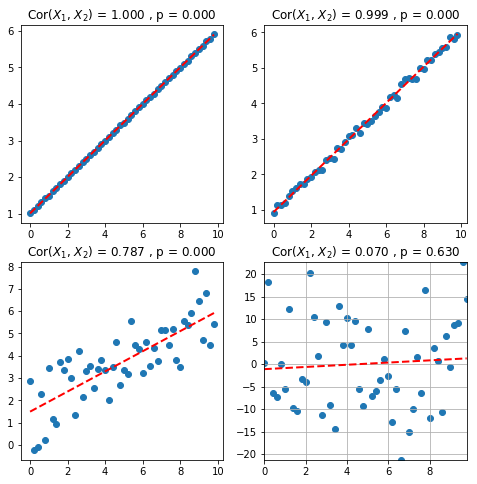

<Figure size 432x288 with 0 Axes>

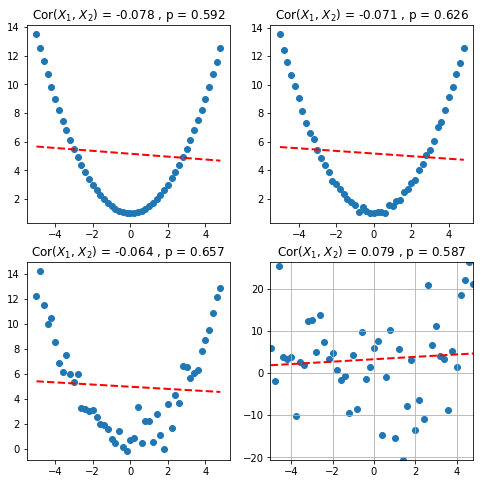

In [6]:
from matplotlib import pylab
import numpy as np
import scipy
from scipy.stats import norm, pearsonr


def _plot_correlation_func(x, y):

    r, p = pearsonr(x, y)
    title = 'Cor($X_1$, $X_2$) = {:.3f} , p = {:.3f}'.format(r,p)
    pylab.scatter(x, y)
    pylab.title(title)
#     pylab.xlabel("$X_1$")
#     pylab.ylabel("$X_2$")

    f1 = scipy.poly1d(scipy.polyfit(x, y, 1))
    pylab.plot(x, f1(x), "r--", linewidth=2)
    # pylab.xticks([w*7*24 for w in [0,1,2,3,4]], ['week %i'%(w+1) for w in
    # [0,1,2,3,4]])


def plot_correlation_demo():
    np.random.seed(0)  # to reproduce the data later on
    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(0, 10, 0.2)

    pylab.subplot(221)
    y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(224)
    y = norm.rvs(1, scale=10, size=len(x))
    _plot_correlation_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

    pylab.clf()
    pylab.figure(num=None, figsize=(8, 8))

    x = np.arange(-5, 5, 0.2)

    pylab.subplot(221)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(222)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(223)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
    _plot_correlation_func(x, y)

    pylab.subplot(224)
    y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
    _plot_correlation_func(x, y)

    pylab.autoscale(tight=True)
    pylab.grid(True)

    pylab.show()

if __name__ == '__main__':
    plot_correlation_demo()

**相関の特徴**
* 線形な関係性を検出するのに有効。
* それ以外（ex. 2次関数）ではうまくいかない。

### 相互情報量